In [ ]:
#import all the necessary libraries to perform data analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#local drive

In [ ]:
from google.colab import files

In [ ]:
file = files.upload()

Saving tmdb_movies_data.csv to tmdb_movies_data.csv


In [ ]:
import io

In [ ]:
data = pd.read_csv(io.BytesIO(file['tmdb_movies_data.csv']))
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [ ]:
data.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.0000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.0000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.0000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.0000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,fire|gun|drive|sacrifice|flashlight,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/1966,15,1.5,1966,127642.2792,0.0


In [ ]:
data.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [ ]:
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## **DATA CLEANING**

In [ ]:
#Check if there are any duplicated rows
data.duplicated().sum()

1

In [ ]:
# Drop the duplicated row and check if there are no duplicated rows after cleaning
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [ ]:
# Since not all columns are needed for analysis, we can drop all irrelevant columns and only keep the relevant columns for further analysis
drop_columns = ['id', 'imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'release_date', 'runtime']
data.drop(drop_columns, axis=1, inplace=True)
data.head()

,popularity,budget,revenue,original_title,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939.3,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,137999939.3,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,101199955.5,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,183999919.0,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,174799923.1,1.385749e+09


In [ ]:
#Firstly, we need to split the genres into different columns to be able to analyze later
data['genre_1'] = data.genres.str.split('|').str.get(0)
data['genre_2'] = data.genres.str.split('|').str.get(1)
data['genre_3'] = data.genres.str.split('|').str.get(2)
data['genre_4'] = data.genres.str.split('|').str.get(3)
#let us check the new dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   budget                10865 non-null  int64  
 2   revenue               10865 non-null  int64  
 3   original_title        10865 non-null  object 
 4   director              10821 non-null  object 
 5   genres                10842 non-null  object 
 6   production_companies  9835 non-null   object 
 7   vote_count            10865 non-null  int64  
 8   vote_average          10865 non-null  float64
 9   release_year          10865 non-null  int64  
 10  budget_adj            10865 non-null  float64
 11  revenue_adj           10865 non-null  float64
 12  genre_1               10842 non-null  object 
 13  genre_2               8514 non-null   object 
 14  genre_3               5078 non-null   object 
 15  genre_4            

In [ ]:
# Exploring the basic information for each column after dropping
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   budget                10865 non-null  int64  
 2   revenue               10865 non-null  int64  
 3   original_title        10865 non-null  object 
 4   director              10821 non-null  object 
 5   genres                10842 non-null  object 
 6   production_companies  9835 non-null   object 
 7   vote_count            10865 non-null  int64  
 8   vote_average          10865 non-null  float64
 9   release_year          10865 non-null  int64  
 10  budget_adj            10865 non-null  float64
 11  revenue_adj           10865 non-null  float64
 12  genre_1               10842 non-null  object 
 13  genre_2               8514 non-null   object 
 14  genre_3               5078 non-null   object 
 15  genre_4            

## **DATA WRANGLING**

In [ ]:
# Drop the row with the NaN value and check if there are NaN values after dropping
data.dropna(inplace=True)
data.isnull().sum().sum()

0

In [ ]:
data.describe()

,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1850.000000,1.850000e+03,1.850000e+03,1850.000000,1850.000000,1850.000000,1.850000e+03,1.850000e+03
mean,0.851918,2.655044e+07,6.908634e+07,321.596757,5.938000,1998.786486,3.218995e+07,8.689775e+07
std,1.433499,4.238577e+07,1.641329e+08,734.598771,0.851518,12.739107,4.642376e+07,1.898620e+08
min,0.001372,0.000000e+00,0.000000e+00,10.000000,2.200000,1960.000000,0.000000e+00,0.000000e+00
25%,0.278440,0.000000e+00,0.000000e+00,24.000000,5.400000,1992.000000,0.000000e+00,0.000000e+00
50%,0.479201,5.080365e+06,2.458645e+06,64.000000,6.000000,2002.000000,9.085950e+06,3.410484e+06
75%,0.955798,3.800000e+07,6.296224e+07,257.000000,6.500000,2009.000000,5.001601e+07,8.309499e+07
max,32.985763,4.250000e+08,2.781506e+09,9767.000000,8.100000,2015.000000,4.250000e+08,2.827124e+09


In [ ]:
# From the above statistics, we found out that minimum budget and revenue is 0. But in real life scenario, this can't be the case..
# Clean the invalid data and check the statistics again
index_err = data.query('budget == 0 or revenue == 0').index
data.drop(index_err, axis=0, inplace=True)

data.describe()

,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,863.000000,8.630000e+02,8.630000e+02,863.000000,863.000000,863.000000,8.630000e+02,8.630000e+02
mean,1.375137,5.256401e+07,1.437233e+08,624.551564,6.093859,2000.123986,6.274498e+07,1.790127e+08
std,1.948192,4.907072e+07,2.167368e+08,988.527697,0.768384,11.057524,5.046901e+07,2.460750e+08
min,0.028227,2.100000e+01,4.200000e+01,10.000000,2.200000,1961.000000,3.169887e+01,6.339774e+01
25%,0.513958,1.800000e+07,1.897268e+07,85.500000,5.600000,1994.000000,2.429999e+07,2.722183e+07
50%,0.913069,3.800000e+07,6.731283e+07,257.000000,6.100000,2003.000000,4.846990e+07,8.974845e+07
75%,1.600676,7.000000e+07,1.792225e+08,733.000000,6.600000,2008.000000,8.895852e+07,2.363153e+08
max,32.985763,4.250000e+08,2.781506e+09,9767.000000,8.100000,2015.000000,4.250000e+08,2.827124e+09


In [ ]:
# Showing the basic information of the final cleansed data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 0 to 10835
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            863 non-null    float64
 1   budget                863 non-null    int64  
 2   revenue               863 non-null    int64  
 3   original_title        863 non-null    object 
 4   director              863 non-null    object 
 5   genres                863 non-null    object 
 6   production_companies  863 non-null    object 
 7   vote_count            863 non-null    int64  
 8   vote_average          863 non-null    float64
 9   release_year          863 non-null    int64  
 10  budget_adj            863 non-null    float64
 11  revenue_adj           863 non-null    float64
 12  genre_1               863 non-null    object 
 13  genre_2               863 non-null    object 
 14  genre_3               863 non-null    object 
 15  genre_4              

# **Exploratory Data Analysis**

**1. Does a particular director's movies receive higher Revenue ?**

In [ ]:
# Calculate the number of movies directed by each director over the 10 year period
data.director.value_counts().head(10)

Clint Eastwood     8
Richard Donner     8
Robert Zemeckis    7
Ridley Scott       7
John Carpenter     6
Renny Harlin       6
George Miller      6
Phillip Noyce      6
Brett Ratner       6
Joel Schumacher    5
Name: director, dtype: int64

In [ ]:
# Find out the top 5 directors by Revenue
revenue_directors = data.groupby('director').agg({'revenue': 'mean'})
top_5_revenue_directors = revenue_directors.sort_values('revenue', ascending=False)[:5]
top_5_revenue_directors

,revenue
director,
J.J. Abrams,2.068178e+09
Kyle Balda|Pierre Coffin,1.156731e+09
Irwin Winkler,1.106280e+09
James Cameron,1.000855e+09
Christopher Nolan,9.694877e+08


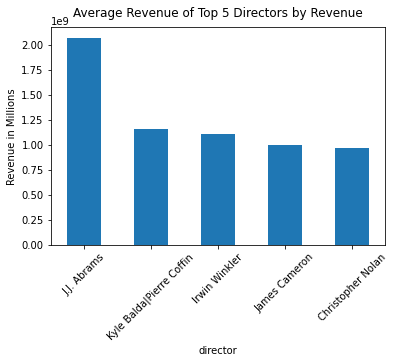

In [ ]:
# Plot the result
ax = top_5_revenue_directors['revenue'].plot.bar();
ax.set_ylabel('Revenue in Millions')
ax.set_title('Average Revenue of Top 5 Directors by Revenue', y=1.02)
ax.set_xticklabels(top_5_revenue_directors.index, rotation = 45);

**2. How many have produced every year over the last 55 years?**

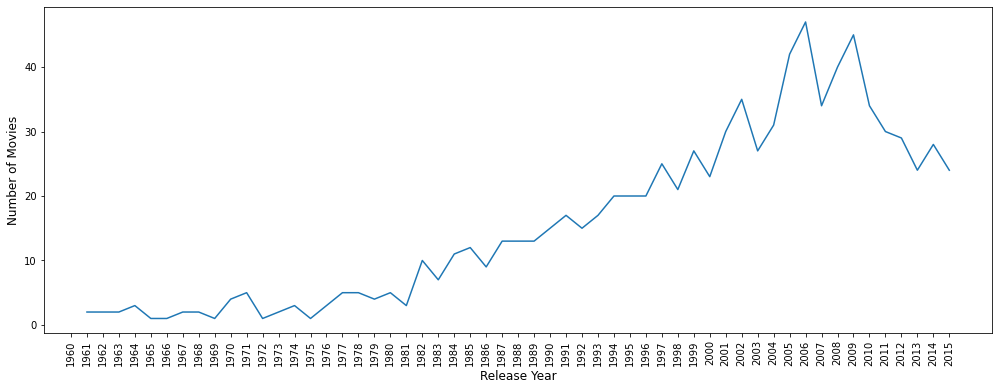

In [ ]:

plot_line = pd.DataFrame(data['release_year'].value_counts().reset_index().sort_values(by = 'index'))
plt.figure(figsize = (17,6));
plt.plot(plot_line['index'],plot_line['release_year']);
plt.xticks(np.arange(1960,2016,1),rotation = 90);
plt.xlabel('Release Year',fontsize = 12);
plt.ylabel('Number of Movies', fontsize  =12);

*   2013 recorded highest number of movies and 1960 recorded lowest.
*   The graph also depicts every year releasing movie has been increased.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


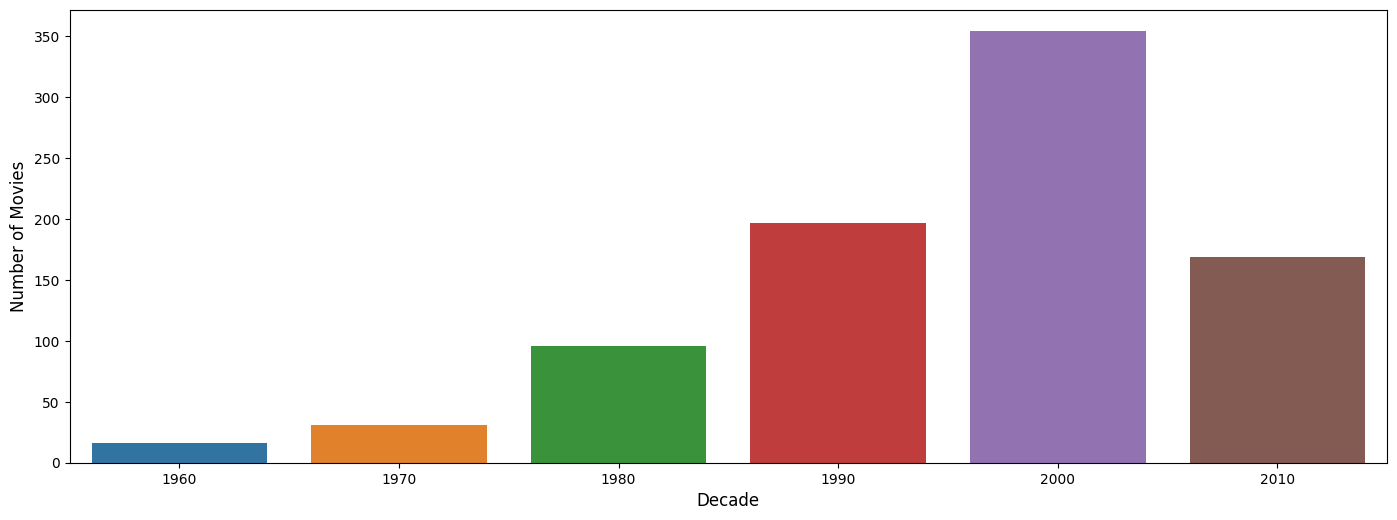

In [ ]:
#Obsereve movies produced by decade
data['decade'] = data['release_year'].apply(lambda x:(x//10)*10)

plt.figure(figsize = (17, 6),dpi = 100);
sns.countplot(data['decade']);
plt.xlabel('Decade', fontsize = 12);
plt.ylabel("Number of Movies", fontsize = 12);

In [ ]:
data.head()

,popularity,budget,revenue,original_title,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,genre_4,decade
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939.3,1.392446e+09,Action,Adventure,Science Fiction,Thriller,2010
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,137999939.3,3.481613e+08,Action,Adventure,Science Fiction,Thriller,2010
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,183999919.0,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,2010
5,9.110700,135000000,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,3929,7.2,2015,124199945.4,4.903142e+08,Western,Drama,Adventure,Thriller,2010
6,8.654359,155000000,440603537,Terminator Genisys,Alan Taylor,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2598,5.8,2015,142599937.3,4.053551e+08,Science Fiction,Action,Thriller,Adventure,2010


In [ ]:
data.tail()


,popularity,budget,revenue,original_title,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,genre_4,decade
10778,0.435312,5000000,7230000,Force 10 from Navarone,Guy Hamilton,Action|Adventure|War|Thriller,Columbia Pictures Corporation,39,6.6,1978,16713503.47,2.416773e+07,Action,Adventure,War,Thriller,1970
10780,0.409377,3500000,24046533,Invasion of the Body Snatchers,Philip Kaufman,Horror|Thriller|Science Fiction|Mystery,United Artists|Solofilm,87,6.5,1978,11699452.43,8.038036e+07,Horror,Thriller,Science Fiction,Mystery,1970
10788,0.277769,24000000,21049053,The Wiz,Sidney Lumet,Adventure|Family|Fantasy|Music|Science Fiction,Universal Pictures|Motown Productions,30,6.1,1978,80224816.68,7.036068e+07,Adventure,Family,Fantasy,Music,1970
10791,0.236193,6800000,26518355,Damien: Omen II,Don Taylor|Mike Hodges,Action|Drama|Horror|Thriller,Twentieth Century Fox Film Corporation|Mace Ne...,71,6.1,1978,22730364.73,8.864292e+07,Action,Drama,Horror,Thriller,1970
10835,0.299911,12000000,20000000,The Sand Pebbles,Robert Wise,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,28,7.0,1966,80616176.31,1.343603e+08,Action,Adventure,Drama,War,1960


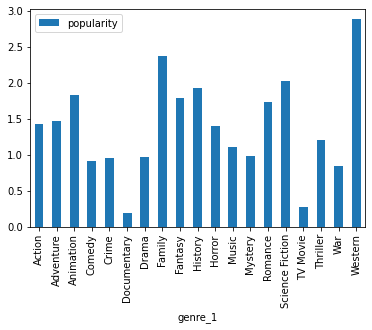

In [ ]:
data.groupby('genre_1')['popularity'].mean().plot(kind = 'bar', label = "popularity")
plt.legend()

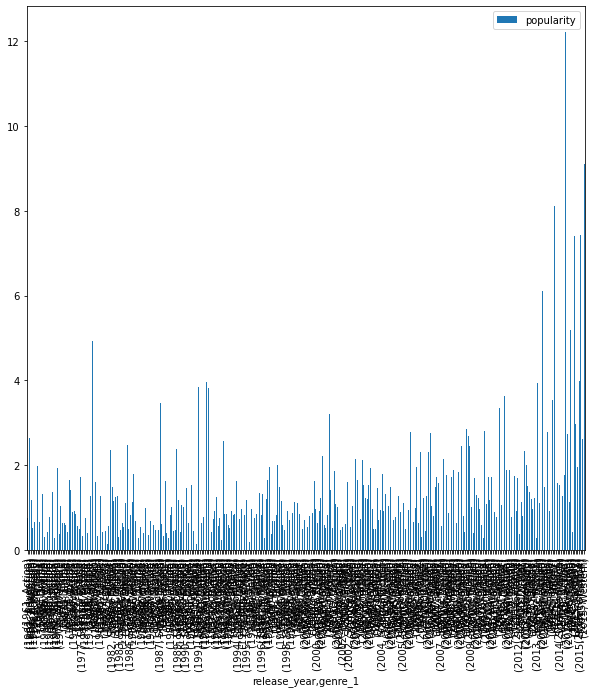

In [ ]:
data.groupby(['release_year', 'genre_1'])['popularity'].mean().plot(kind = 'bar', figsize = (10,10))
plt.legend()

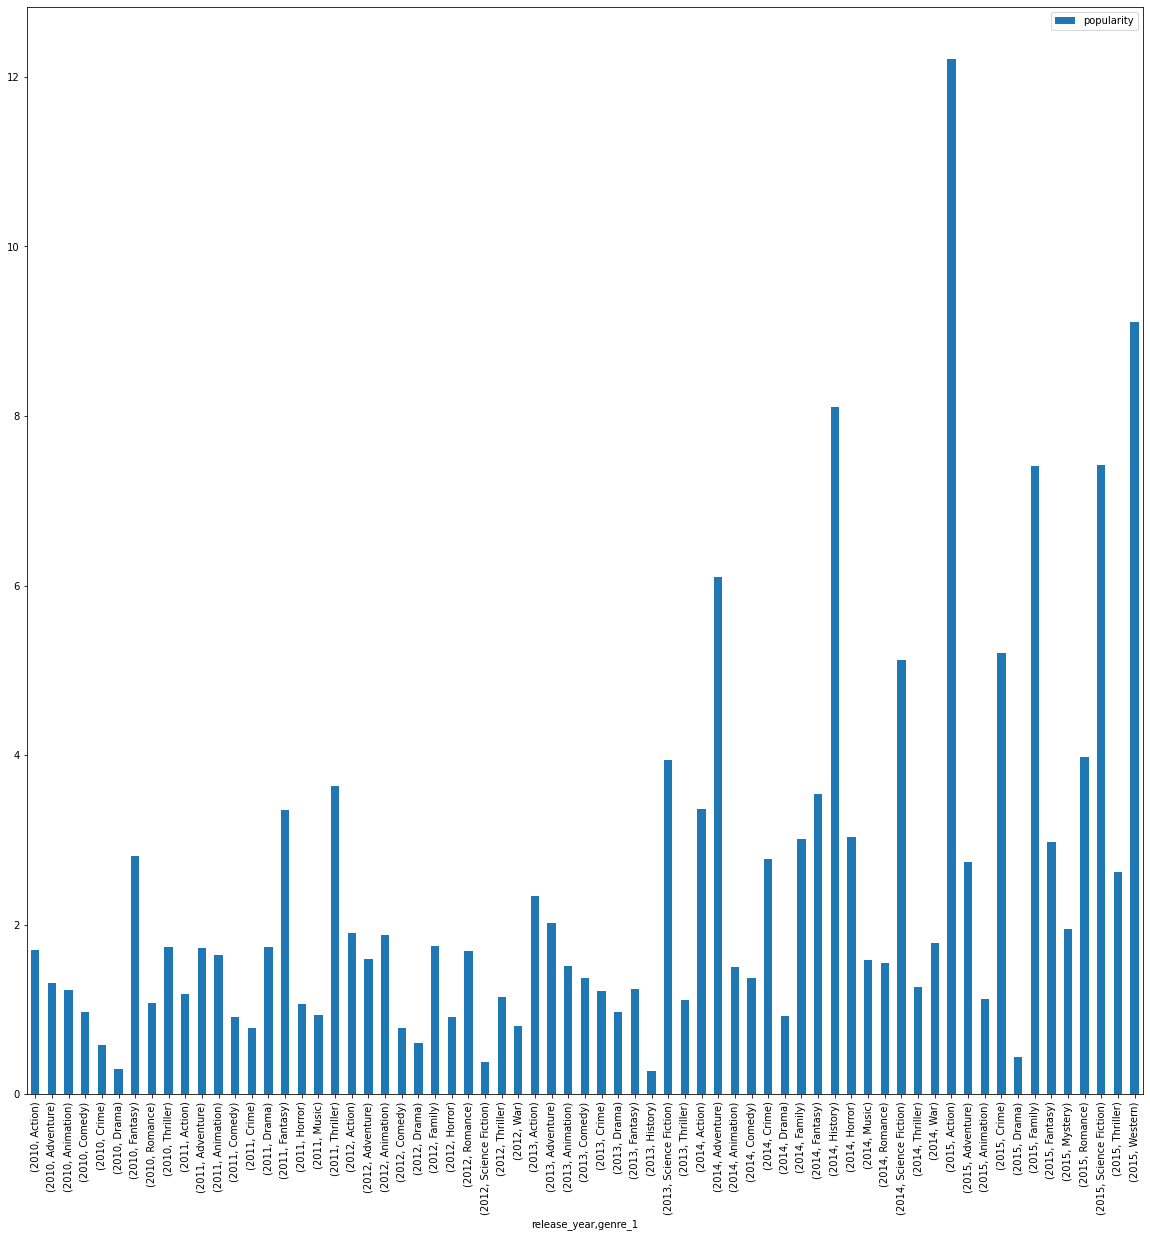

In [ ]:
five_years = data[data['release_year'] >= 2010]
five_years.groupby(['release_year', 'genre_1'])['popularity'].mean().plot(kind = 'bar', figsize = (20, 20))
plt.legend()

In [ ]:
y2010 = data[data['release_year'] == 2010]
y2011 = data[data['release_year'] == 2011]
y2012 = data[data['release_year'] == 2012]
y2013 = data[data['release_year'] == 2013]
y2014 = data[data['release_year'] == 2014]
y2015 = data[data['release_year'] == 2015]



In [ ]:
y2010.shape

(34, 17)

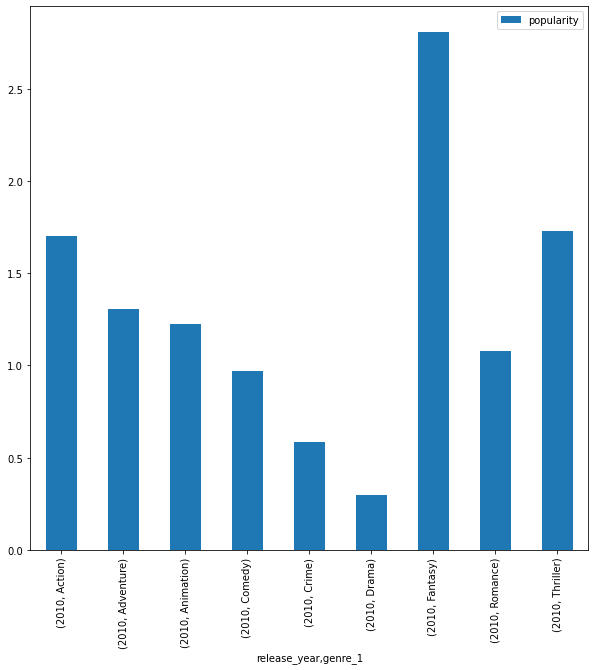

In [ ]:
y2010.groupby(['release_year', 'genre_1'])['popularity'].mean().plot(kind = 'bar', figsize = (10, 10))
plt.legend()
plt.show()

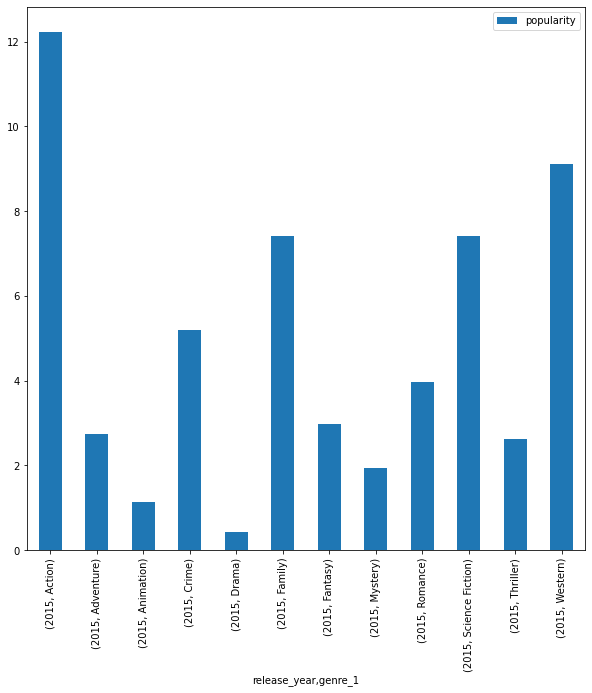

In [ ]:
y2015.groupby(['release_year', 'genre_1'])['popularity'].mean().plot(kind = 'bar', figsize = (10, 10))
plt.legend()
plt.show()

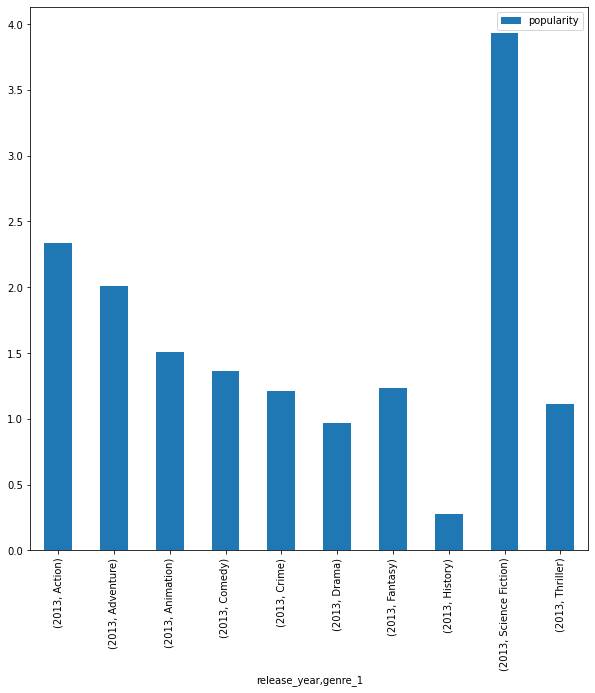

In [ ]:
y2013.groupby(['release_year', 'genre_1'])['popularity'].mean().plot(kind = 'bar', figsize = (10, 10))
plt.legend()
plt.show()

In [ ]:
info = pd.DataFrame(data['budget'].sort_values(ascending = False))
info['original_title'] = data['original_title']
temp = list(map(str, (info['original_title'])))


In [ ]:
info

,budget,original_title
2244,425000000,The Warrior's Way
6570,270000000,Superman Returns
4411,260000000,John Carter
4363,250000000,The Dark Knight Rises
643,250000000,X-Men: Days of Future Past
...,...,...
7827,400000,Mad Max
1354,10000,Eraserhead
10495,113,"The Karate Kid, Part II"
1733,75,Wanted


In [ ]:
temp

["The Warrior's Way",
 'Superman Returns',
 'John Carter',
 'The Dark Knight Rises',
 'X-Men: Days of Future Past',
 'Avatar',
 'Man of Steel',
 'X-Men: The Last Stand',
 'Battleship',
 'Quantum of Solace',
 'Green Lantern',
 'Star Wars: The Force Awakens',
 'Terminator Salvation',
 'Cars 2',
 'World War Z',
 'Tomorrowland',
 'The Dark Knight',
 'Brave',
 'Maleficent',
 'Jupiter Ascending',
 'Monsters vs Aliens',
 'Up',
 'The Good Dinosaur',
 'G.I. Joe: The Rise of Cobra',
 'Wild Wild West',
 'Dawn of the Planet of the Apes',
 'Wreck-It Ralph',
 'The Polar Express',
 'Big Hero 6',
 'How to Train Your Dragon',
 'Shrek Forever After',
 'Cowboys & Aliens',
 'Shrek the Third',
 'Inception',
 'Poseidon',
 'Alexander',
 'Terminator Genisys',
 'Jurassic World',
 'G-Force',
 'Bee Movie',
 'The Matrix Revolutions',
 'The Last Airbender',
 'X-Men Origins: Wolverine',
 'I Am Legend',
 'Ratatouille',
 'Harry Potter and the Order of the Phoenix',
 'Shrek 2',
 'Night at the Museum: Battle of the Smi

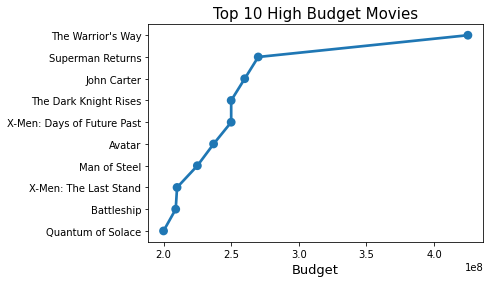

In [ ]:
x = list(temp[:10])
y = list(info['budget'][:10])

ax = sns.pointplot(x=y, y=x)
sns.set(rc={'figure.figsize' : (10,10)})
ax.set_title("Top 10 High Budget Movies", fontsize = 15)
ax.set_xlabel("Budget", fontsize = 13)
sns.set_style("darkgrid")

In [ ]:
info = pd.DataFrame(data['revenue'].sort_values(ascending = False))
info['original_title'] = data['original_title']
temp = list(map(str, (info['original_title'])))

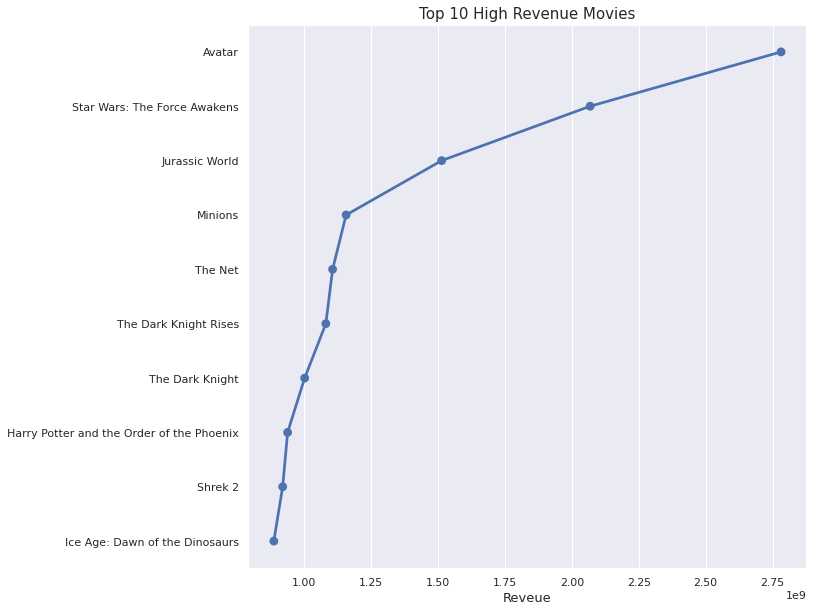

In [ ]:
x = list(temp[:10])
y = list(info['revenue'][:10])

ax = sns.pointplot(x=y, y=x)
sns.set(rc={'figure.figsize' : (10,10)})
ax.set_title("Top 10 High Revenue Movies", fontsize = 15)
ax.set_xlabel("Reveue", fontsize = 13)
sns.set_style("darkgrid")

In [ ]:
info = pd.DataFrame(data['vote_average'].sort_values(ascending = False))
info['original_title'] = data['original_title']
temp = list(map(str, (info['original_title'])))

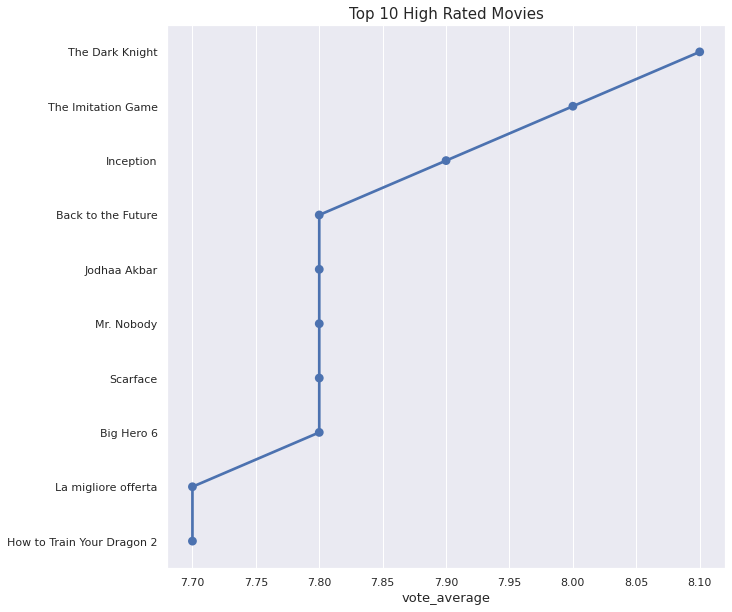

In [ ]:
x = list(temp[:10])
y = list(info['vote_average'][:10])

ax = sns.pointplot(x=y, y=x)
sns.set(rc={'figure.figsize' : (10,10)})
ax.set_title("Top 10 High Rated Movies", fontsize = 15)
ax.set_xlabel("vote_average", fontsize = 13)
sns.set_style("darkgrid")

In [ ]:
data[data['revenue'].notnull()][['original_title', 'budget', 'revenue']].sort_values('revenue')


,original_title,budget,revenue
10236,Teenage Mutant Ninja Turtles III,21,42
9332,Teenage Mutant Ninja Turtles II: The Secret of...,25000000,78
1733,Wanted,75,134
4970,Brother Bear,100000000,250
3621,Nuit Blanche,2500000,3358
...,...,...,...
8094,The Net,22000000,1106279658
8,Minions,74000000,1156730962
0,Jurassic World,150000000,1513528810
3,Star Wars: The Force Awakens,200000000,2068178225


In [ ]:
data.insert(2, 'profit', data['revenue'] - data['budget'])
data['profit'] = data['profit'].astype('int64')

In [ ]:
data.head()

,popularity,budget,profit,revenue,original_title,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,genre_4,decade
0,32.985763,150000000,1363528810,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939.3,1.392446e+09,Action,Adventure,Science Fiction,Thriller,2010
1,28.419936,150000000,228436354,378436354,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,137999939.3,3.481613e+08,Action,Adventure,Science Fiction,Thriller,2010
3,11.173104,200000000,1868178225,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,183999919.0,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,2010
5,9.110700,135000000,397950503,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,3929,7.2,2015,124199945.4,4.903142e+08,Western,Drama,Adventure,Thriller,2010
6,8.654359,155000000,285603537,440603537,Terminator Genisys,Alan Taylor,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2598,5.8,2015,142599937.3,4.053551e+08,Science Fiction,Action,Thriller,Adventure,2010


In [ ]:
def get_high_low(col):

  highest_index = data[col].idxmax()
  highest_index_info = pd.DataFrame(data.loc[highest_index])

  lowest_index = data[col].idxmin()
  lowest_index_info = pd.DataFrame(data.loc[lowest_index])

  result = pd.concat([highest_index_info, lowest_index_info], axis = 1, names = ["Details"])
  return result

In [ ]:
get_high_low('profit')

,1386,2244
popularity,9.43277,0.25054
budget,237000000,425000000
profit,2544505847,-413912431
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
director,James Cameron,Sngmoo Lee
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.
vote_count,8458,74
vote_average,7.1,6.4


In [ ]:
get_high_low('budget')

,2244,10236
popularity,0.25054,1.02495
budget,425000000,21
profit,-413912431,21
revenue,11087569,42
original_title,The Warrior's Way,Teenage Mutant Ninja Turtles III
director,Sngmoo Lee,Stuart Gillard
genres,Adventure|Fantasy|Action|Western|Thriller,Action|Adventure|Comedy|Family|Fantasy
production_companies,Boram Entertainment Inc.,New Line Cinema|Golden Harvest Pictures|Clearw...
vote_count,74,95
vote_average,6.4,5.2


In [ ]:
get_high_low('revenue')

,1386,10236
popularity,9.43277,1.02495
budget,237000000,21
profit,2544505847,21
revenue,2781505847,42
original_title,Avatar,Teenage Mutant Ninja Turtles III
director,James Cameron,Stuart Gillard
genres,Action|Adventure|Fantasy|Science Fiction,Action|Adventure|Comedy|Family|Fantasy
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,New Line Cinema|Golden Harvest Pictures|Clearw...
vote_count,8458,95
vote_average,7.1,5.2
